# Importing libraries and data needed

In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import random

# Setting up datetime and logdir for tensorboard 

In [2]:
from datetime import datetime
from datetime import timezone

def utc_to_local(utc_dt):
    return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=timedelta(hours=9))

# MNIST (Softmax)

In [3]:
## import MNIST data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist.train.images.shape

(55000, 784)

Epoch: 0001, Cost: 6.064
Epoch: 0002, Cost: 1.936
Epoch: 0003, Cost: 1.236
Epoch: 0004, Cost: 0.966
Epoch: 0005, Cost: 0.815
Epoch: 0006, Cost: 0.717
Epoch: 0007, Cost: 0.650
Epoch: 0008, Cost: 0.598
Epoch: 0009, Cost: 0.557
Epoch: 0010, Cost: 0.522
Epoch: 0011, Cost: 0.498
Epoch: 0012, Cost: 0.472
Epoch: 0013, Cost: 0.453
Epoch: 0014, Cost: 0.438
Epoch: 0015, Cost: 0.423
Epoch: 0016, Cost: 0.409
Epoch: 0017, Cost: 0.397
Epoch: 0018, Cost: 0.387
Epoch: 0019, Cost: 0.379
Epoch: 0020, Cost: 0.371
Epoch: 0021, Cost: 0.363
Epoch: 0022, Cost: 0.357
Epoch: 0023, Cost: 0.349
Epoch: 0024, Cost: 0.345
Epoch: 0025, Cost: 0.338
Epoch: 0026, Cost: 0.335
Epoch: 0027, Cost: 0.330
Epoch: 0028, Cost: 0.326
Epoch: 0029, Cost: 0.321
Epoch: 0030, Cost: 0.318
Epoch: 0031, Cost: 0.315
Epoch: 0032, Cost: 0.311
Epoch: 0033, Cost: 0.308
Epoch: 0034, Cost: 0.306
Epoch: 0035, Cost: 0.301
Epoch: 0036, Cost: 0.300
Epoch: 0037, Cost: 0.297
Epoch: 0038, Cost: 0.296
Epoch: 0039, Cost: 0.292
Epoch: 0040, Cost: 0.289


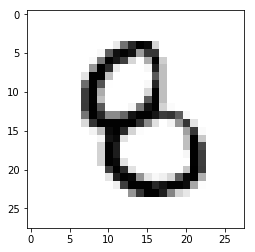

In [26]:
## Log Directory Setting

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "MNIST(Softmax)"
logdir = "{}/run-{}/".format(root_logdir, now)

## Resetting Graph
tf.reset_default_graph()

## Random Seed
tf.set_random_seed(100)

## place holders and variables

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])


with tf.name_scope("Softmax"):

    W = tf.Variable(tf.random_normal([784,10]))
    b = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(X,W) + b
    
## Parameters

learning_rate = 0.001    
batch_size = 100
num_epochs = 50
num_iterations = int(mnist.train.num_examples / batch_size)
                    

                    
## Cost/Loss & Optimizer
                    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
## tf.stop_gradient? v2 vs v1???


train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
                                            
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) ##tf.argmax 다시 찾아보기
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", accuracy)
    
## Running the actual session, training the Softmax model
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost=0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)

        print(f"Epoch: {(epoch +1):04d}, Cost: {avg_cost:.3f}")
        
    print("Learning is Done!")
                      
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels},))
    
    ##get one and predict
                      
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1]}),)
                      
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest",)
    plt.show()

# MNIST (NN with normal random initializer, 3 layers)

Epoch: 0001, Cost: 151.623
Epoch: 0002, Cost: 38.084
Epoch: 0003, Cost: 23.888
Epoch: 0004, Cost: 16.628
Epoch: 0005, Cost: 11.853
Epoch: 0006, Cost: 8.515
Epoch: 0007, Cost: 6.241
Epoch: 0008, Cost: 4.571
Epoch: 0009, Cost: 3.335
Epoch: 0010, Cost: 2.445
Epoch: 0011, Cost: 1.877
Epoch: 0012, Cost: 1.380
Epoch: 0013, Cost: 1.061
Epoch: 0014, Cost: 0.801
Epoch: 0015, Cost: 0.681
Learning is Done!
Accuracy: 0.9473
Label:  [0]
Prediction:  [0]


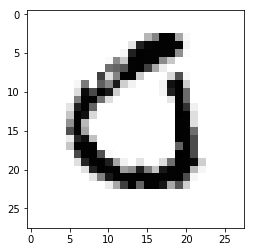

In [29]:
## Log Directoroy Setting

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "MNIST(NN)"
logdir = "{}/run-{}/".format(root_logdir, now)

## Resetting Graph
tf.reset_default_graph()

## Random Seed
tf.set_random_seed(100)


## Layers, Placeholers and Variables

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope("Layer1"):
    
    W1 = tf.Variable(tf.random_normal([784,256]))
    b1 = tf.Variable(tf.random_normal([256]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
with tf.name_scope("Layer2"):
    
    W2 = tf.Variable(tf.random_normal([256,256]))
    b2 = tf.Variable(tf.random_normal([256]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    
with tf.name_scope("Layer3"):
    
    W3 = tf.Variable(tf.random_normal([256,10]))
    b3 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L2,W3) + b3

    
## Parameters

learning_rate = 0.001    
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)
                    
## Cost/Loss & Optimizer
                    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
## tf.stop_gradient? v2 vs v1???

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
                                            
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) ##tf.argmax 다시 찾아보기
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", accuracy)
    
## Running the actual session, training the Softmax model
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost=0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)

        print(f"Epoch: {(epoch +1):04d}, Cost: {avg_cost:.3f}")
        
    print("Learning is Done!")
                      
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels},))
    
    ##get one and predict
                      
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1]}),)
                      
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest",)
    plt.show()

# MNIST(NN with Xavier Initializer)

Epoch: 0001, Cost: 0.315
Epoch: 0002, Cost: 0.115
Epoch: 0003, Cost: 0.075
Epoch: 0004, Cost: 0.054
Epoch: 0005, Cost: 0.041
Epoch: 0006, Cost: 0.031
Epoch: 0007, Cost: 0.024
Epoch: 0008, Cost: 0.019
Epoch: 0009, Cost: 0.017
Epoch: 0010, Cost: 0.016
Epoch: 0011, Cost: 0.011
Epoch: 0012, Cost: 0.011
Epoch: 0013, Cost: 0.008
Epoch: 0014, Cost: 0.010
Epoch: 0015, Cost: 0.010
Learning is Done!
Accuracy: 0.9793
Label:  [0]
Prediction:  [0]


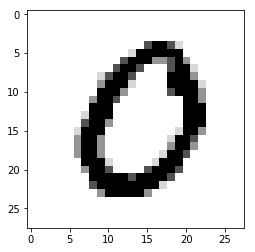

In [31]:
## Log Directoroy Setting

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "MNIST(NN with Xavier)"
logdir = "{}/run-{}/".format(root_logdir, now)

## Resetting Graph
tf.reset_default_graph()

## Random Seed
tf.set_random_seed(100)


## Layers, Placeholers and Variables

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope("Layer1"):
    
    W1 = tf.get_variable("W1", shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([256]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
with tf.name_scope("Layer2"):
    
    W2 = tf.get_variable("W2", shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([256]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    
with tf.name_scope("Layer3"):
    
    W3 = tf.get_variable("W3", shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L2,W3) + b3

    
## Parameters

learning_rate = 0.001    
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)
                    
## Cost/Loss & Optimizer
                    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
## tf.stop_gradient? v2 vs v1???

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
                                            
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) ##tf.argmax 다시 찾아보기
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", accuracy)
    
## Running the actual session, training the Softmax model
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost=0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)

        print(f"Epoch: {(epoch +1):04d}, Cost: {avg_cost:.3f}")
        
    print("Learning is Done!")
                      
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels},))
    
    ##get one and predict
                      
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1]}),)
                      
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest",)
    plt.show()

# MNIST (NN with Xavier, 5 layers)

Epoch: 0001, Cost: 0.378
Epoch: 0002, Cost: 0.107
Epoch: 0003, Cost: 0.082
Epoch: 0004, Cost: 0.057
Epoch: 0005, Cost: 0.050
Epoch: 0006, Cost: 0.041
Epoch: 0007, Cost: 0.039
Epoch: 0008, Cost: 0.033
Epoch: 0009, Cost: 0.028
Epoch: 0010, Cost: 0.029
Epoch: 0011, Cost: 0.028
Epoch: 0012, Cost: 0.017
Epoch: 0013, Cost: 0.022
Epoch: 0014, Cost: 0.018
Epoch: 0015, Cost: 0.016
Learning is Done!
Accuracy: 0.9803
Label:  [0]
Prediction:  [0]


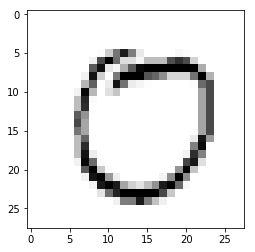

In [34]:
## Log Directoroy Setting

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "MNIST(NN with Xavier, 5 layers)"
logdir = "{}/run-{}/".format(root_logdir, now)

## Resetting Graph
tf.reset_default_graph()

## Random Seed
tf.set_random_seed(100)


## Layers, Placeholers and Variables

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

with tf.name_scope("Layer1"):
    
    W1 = tf.get_variable("W1", shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
with tf.name_scope("Layer2"):
    
    W2 = tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    
with tf.name_scope("Layer3"):
    
    W3 = tf.get_variable("W3", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.matmul(L2,W3) + b3

with tf.name_scope("Layer4"):
    
    W4 = tf.get_variable("W4", shape=[512,256], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([256]))
    L4 = tf.matmul(L3,W4) + b4

with tf.name_scope("Layer5"):
    
    W5 = tf.get_variable("W5", shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L4,W5) + b5

    
    
## Parameters

learning_rate = 0.001    
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)
                    
## Cost/Loss & Optimizer
                    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
## tf.stop_gradient? v2 vs v1???

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
                                            
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) ##tf.argmax 다시 찾아보기
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", accuracy)
    
## Running the actual session, training the Softmax model
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost=0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)

        print(f"Epoch: {(epoch +1):04d}, Cost: {avg_cost:.3f}")
        
    print("Learning is Done!")
                      
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels},))
    
    ##get one and predict
                      
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1]}),)
                      
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest",)
    plt.show()

# MNIST (NN with Xavier, 5 layers, Dropouts)

Epoch: 0001, Cost: 0.686
Epoch: 0002, Cost: 0.255
Epoch: 0003, Cost: 0.193
Epoch: 0004, Cost: 0.161
Epoch: 0005, Cost: 0.140
Epoch: 0006, Cost: 0.126
Epoch: 0007, Cost: 0.123
Epoch: 0008, Cost: 0.112
Epoch: 0009, Cost: 0.110
Epoch: 0010, Cost: 0.100
Epoch: 0011, Cost: 0.099
Epoch: 0012, Cost: 0.099
Epoch: 0013, Cost: 0.090
Epoch: 0014, Cost: 0.089
Epoch: 0015, Cost: 0.086
Learning is Done!
Accuracy: 0.981
Label:  [1]
Prediction:  [1]


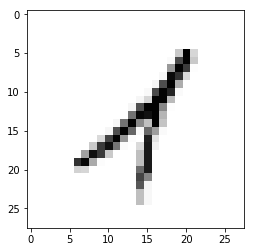

In [5]:
## Log Directoroy Setting

now = datetime.now().strftime("%Y%m%d%H%M")
root_logdir = "MNIST(NN with Dropouts)"
logdir = "{}/run-{}/".format(root_logdir, now)

## Resetting Graph
tf.reset_default_graph()

## Random Seed
tf.set_random_seed(100)


## Layers, Placeholers and Variables
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])


## Dropout rate (0.5 for training, 1 for testing)
keep_prob = tf.placeholder(tf.float32)


## NN Layers

with tf.name_scope("Layer1"):
    
    W1 = tf.get_variable("W1", shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([512]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    L1 = tf.nn.dropout(L1, keep_prob = keep_prob)
    
    
with tf.name_scope("Layer2"):
    
    W2 = tf.get_variable("W2", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([512]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
    L1 = tf.nn.dropout(L2, keep_prob = keep_prob)
    
with tf.name_scope("Layer3"):
    
    W3 = tf.get_variable("W3", shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([512]))
    L3 = tf.matmul(L2,W3) + b3
    L3 = tf.nn.dropout(L3, keep_prob = keep_prob)

with tf.name_scope("Layer4"):
    
    W4 = tf.get_variable("W4", shape=[512,256], initializer=tf.contrib.layers.xavier_initializer())
    b4 = tf.Variable(tf.random_normal([256]))
    L4 = tf.matmul(L3,W4) + b4
    L4 = tf.nn.dropout(L4, keep_prob = keep_prob)
    
with tf.name_scope("Layer5"):
    
    W5 = tf.get_variable("W5", shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
    b5 = tf.Variable(tf.random_normal([10]))
    hypothesis = tf.matmul(L4,W5) + b5
        
        
# parameters
learning_rate = 0.001
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)        
                    
    
## Cost/Loss & Optimizer
                    
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=tf.stop_gradient(Y)))
## tf.stop_gradient? v2 vs v1???

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
                                            
correct_prediction = tf.equal(tf.argmax(hypothesis, axis=1), tf.argmax(Y, axis=1)) ##tf.argmax 다시 찾아보기
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar("accuracy", accuracy)
    
## Running the actual session, training the Softmax model
with tf.Session() as sess:
    
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(num_epochs):
        avg_cost=0
        
        for iteration in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.5})
            avg_cost += cost_val / num_iterations
        
        writer.add_summary(summary, global_step=epoch)

        print(f"Epoch: {(epoch +1):04d}, Cost: {avg_cost:.3f}")
        
    print("Learning is Done!")
                      
    print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1},))
    
    ##get one and predict
                      
    r = random.randint(0, mnist.test.num_examples - 1)
    
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r: r+1], axis=1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, axis=1), feed_dict={X: mnist.test.images[r:r+1], keep_prob: 1}))
                      
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap="Greys", interpolation="nearest",)
    plt.show()

# MNIST (+ Batch Normalization)